### Sudhanshu Sali
### BE IT
### 9059
### DL Assignment-2

In [1]:
#import the necessary packages
import tensorflow as tf
from keras.models import Sequential 
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
#load training and testing dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [3]:
#model building using Keras
import keras
model = Sequential()
model.add(keras.layers.Flatten(input_shape=((28,28))))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
#train the model using sgd
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6314 - accuracy: 0.8422 - val_loss: 0.3529 - val_accuracy: 0.9050
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3370 - accuracy: 0.9062 - val_loss: 0.2911 - val_accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2899 - accuracy: 0.9184 - val_loss: 0.2623 - val_accuracy: 0.9266
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2603 - accuracy: 0.9264 - val_loss: 0.2373 - val_accuracy: 0.9331
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2372 - accuracy: 0.9332 - val_loss: 0.2206 - val_accuracy: 0.9378


In [5]:
#model evaluation
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss = %.3f"%test_loss)
print("Accuracy = %.3f"%test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9378
Loss = 0.221
Accuracy = 0.938


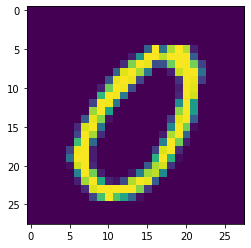

The handwritten number in the image is 0


In [6]:
#prediction using the model
n =random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"% np.argmax(prediction[n]))

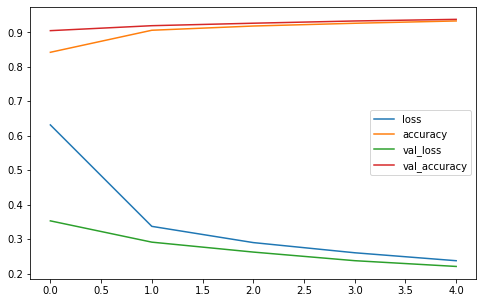

In [7]:
#plot the training loss and accuracy
pd.DataFrame(H.history).plot(figsize=(8,5))
plt.show()

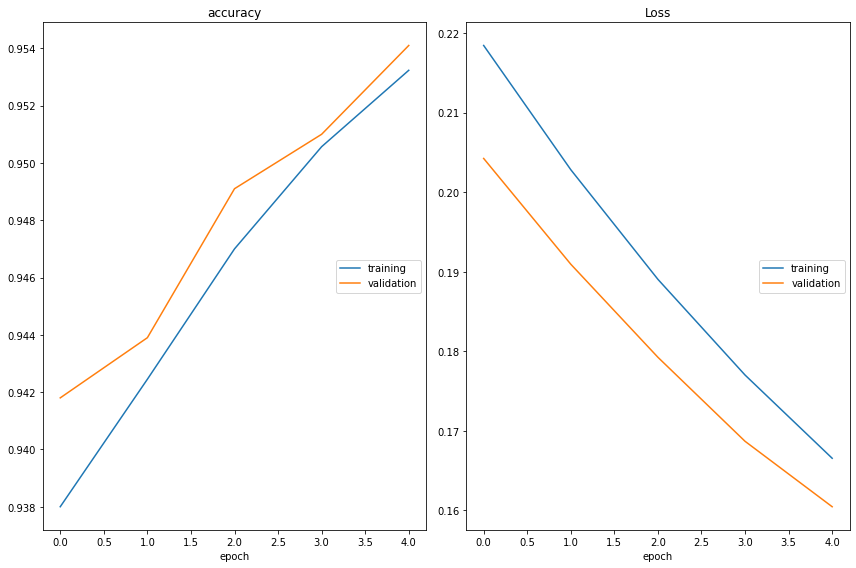

accuracy
	training         	 (min:    0.938, max:    0.953, cur:    0.953)
	validation       	 (min:    0.942, max:    0.954, cur:    0.954)
Loss
	training         	 (min:    0.167, max:    0.218, cur:    0.167)
	validation       	 (min:    0.160, max:    0.204, cur:    0.160)


In [8]:
!pip install livelossplot
from livelossplot import PlotLossesKeras
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,callbacks=[PlotLossesKeras()],verbose=0)